In [1]:
# GENERAL PACKAGE IMPORT
# ----------------------
import sys
sys.path.append('/Users/huangwp/Documents/git/HIL-Sim/flexlab/db_layer') 
from db_interface import DB_Interface
import requests
import numpy as np
import json
import pandas as pd
from pandas import DataFrame
from io import StringIO

import datetime as dt
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.dates import date2num
import seaborn
import timeit
import json
import pickle

import matplotlib.pyplot as plt
import datetime
import db_plotting

In [2]:
data22 = pd.read_csv('data22_revised.csv', parse_dates = True, index_col = 0)
data23 = pd.read_csv('data23_revised.csv', parse_dates = True, index_col = 0)

data22['datetime'] = pd.to_datetime(data22['datetime'])
data23['datetime'] = pd.to_datetime(data23['datetime'])

In [3]:
print(type(data22['datetime'].iloc[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [4]:
data22['gta_window'] = 0
data23['gta_window'] = 0

gta_st = datetime.time(14,0,0)
gta_en = datetime.time(18,0,0)

data22['date'] = data22['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data22['time'] = data22['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

data23['date'] = data23['datetime'].apply(lambda x: datetime.date(x.year, x.month, x.day))
data23['time'] = data23['datetime'].apply(lambda x: datetime.time(x.hour, x.minute, x.second))

gta_ts = (data22['time'] > gta_st) & (data22['time'] <= gta_en)

data22['gta_window'][gta_ts] = 1
data23['gta_window'][gta_ts] = 1

#print(data22['gta_window'][gta_ts])

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/4235634339.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data22['gta_window'][gta_ts] = 1
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/4235634339.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data23['gta_window'][gta_ts] = 1


In [5]:
print(data22.columns)

Index(['desk1_plug_power', 'desk2_plug_power', 'desk3_plug_power',
       'desk4_plug_power', 'desk5_plug_power', 'desk6_plug_power',
       'desk3_light_power', 'desk4_light_power', 'desk2_light_power',
       'desk1_6_light_power', 'desk5_light_power', '1A-VAV1-Zn_Temp',
       '1A-VAV2-Zn_Temp', '1A-VAV3-Zn_Temp', '1A-VAV1-OccupiedCoolingSetpt',
       '1A-VAV1-UnoccupiedCoolingSetpt', '1A-VAV1-OccupiedHeatingSetpt',
       '1A-VAV1-UnoccupiedHeatingSetpt', '1A-VAV2-OccupiedCoolingSetpt',
       '1A-VAV2-UnoccupiedHeatingSetpt', '1A-VAV2-UnoccupiedCoolingSetpt',
       '1A-VAV2-OccupiedHeatingSetpt', '1A-VAV3-OccupiedCoolingSetpt',
       '1A-VAV3-UnoccupiedHeatingSetpt', '1A-VAV3-UnoccupiedCoolingSetpt',
       '1A-VAV3-OccupiedHeatingSetpt', '1A-El-AHU', '1A-El-CHWP', '1A-El-HWP',
       '1A-El-Exhaust Fan', '1A-Th-Chilled Water', '1B-OAT-1',
       '1A-MidZone-TCS6-DBT', '1A-NorthZone-DBT', '1A-WindowZone-TCS7-DBT',
       '1A-VAV1-DischargeAirTemp', '1A-VAV2-DischargeAirTemp',
 

### Metrics

In [6]:
data22 = data22.assign(COP='COP') 
#data22['COP'] = data22['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data22['COP'] = 2.9
data23 = data23.assign(COP='COP') 
#data23['COP'] = data23['oat_C'].apply(lambda x: (0.548 + 0.0951*x + (-7.63E-04)*x**2))
data23['COP'] = 2.9

In [7]:
data22 = data22.assign(chiller = 'Chiller_load') 
data22['Chiller_load'] = (data22['1A-Th-Chilled Water']/data22['COP'])*-1
data22['cooling_power [W]'] = data22['1A-El-AHU'] + data22['1A-El-Exhaust Fan'] + data22['1A-El-CHWP'] + data22['Chiller_load']

data23 = data23.assign(chiller = 'Chiller_load') 
data23['Chiller_load'] = (data23['1B-Th-Chilled Water']/data23['COP'])*-1
data23['cooling_power [W]'] = data23['1B-El-AHU'] + data23['1B-El-Exhaust Fan'] + data23['1B-El-CHWP'] + data23['Chiller_load']

In [8]:
day_range1=[8,22,23]
day_range2=[9,1,1]

day_range=day_range1
en_1a = []
en_1b = []

# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data23['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)
    
day_range=day_range2

for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data23['date'] == datetime.date(2021, day_range[0], day)
    print(day)
    day_en_1a = round((data22['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1a.append(day_en_1a)
      
    day_en_1b = round((data23['cooling_power [W]'][mask_1].sum()/4000),2)
    en_1b.append(day_en_1b)


    
print(en_1a)
print(en_1b)

22
23
1
[14.22, 13.54, 18.53]
[6.91, 4.32, 13.62]


In [9]:
#test_day_mask = (data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2])) 


day_range=day_range1
test_day_mask1=(data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2]))

day_range=day_range2
test_day_mask2=(data23['date'] >= datetime.date(2021, day_range[0], day_range[1])) & (data23['date'] <= datetime.date(2021, day_range[0], day_range[2]))

test_day_mask=(test_day_mask1==True) | (test_day_mask2==True)

In [10]:
day_range[2]

1

In [11]:
print(test_day_mask)

time
2021-08-20 23:45:00    False
2021-08-21 00:00:00    False
2021-08-21 00:15:00    False
2021-08-21 00:30:00    False
2021-08-21 00:45:00    False
                       ...  
2021-09-01 22:45:00     True
2021-09-01 23:00:00     True
2021-09-01 23:15:00     True
2021-09-01 23:30:00     True
2021-09-01 23:45:00     True
Name: date, Length: 1153, dtype: bool


In [12]:
data23 = data23[test_day_mask]
data22 = data22[test_day_mask]

/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:38: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


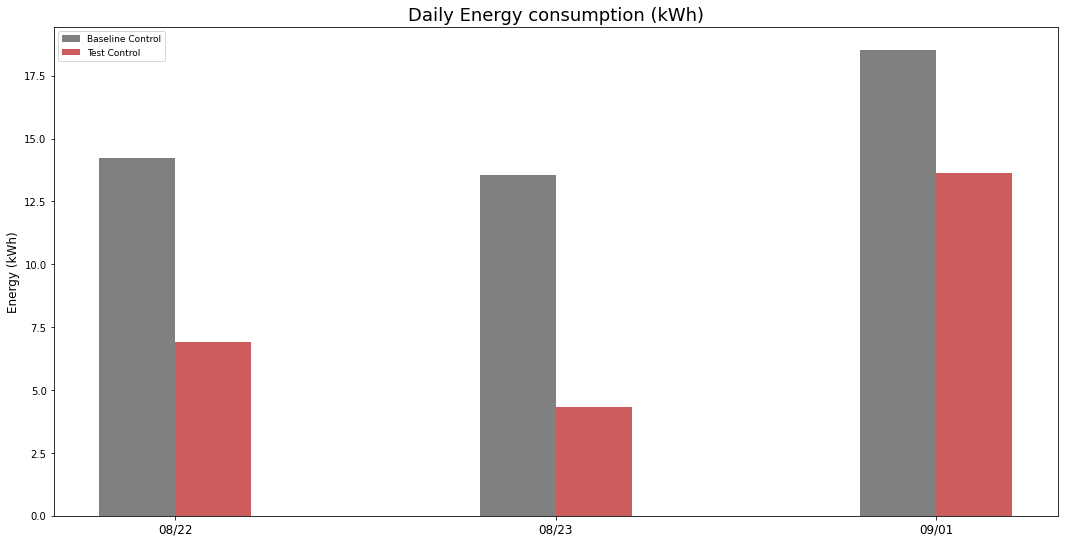

In [13]:
db_plotting.energy_plot(data23, en_1a, en_1b, 'Daily Energy consumption (kWh)', 'Energy (kWh)')

### Shed

In [14]:
data23['G36 Demand Shed'] = data23['cooling_power [W]'] - data22['cooling_power [W]']

shed_1a = []
shed_1b = []


day_range=day_range1
# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)
    
day_range=day_range2
# define dates for the calculation
for day in range(day_range[1], day_range[2]+1):    
    mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
    #print(day) 
    day_shed_1a = (data22['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1a.append(day_shed_1a)
    
    day_shed_1b = (data23['cooling_power [W]'][mask_1][gta_ts].mean())
    shed_1b.append(day_shed_1b)


    #day_shed_1b = (data23['G36 Demand Shed'][mask_1][gta_ts].mean())
    #shed_1b.append(day_shed_1b)

In [15]:
print(data23['G36 Demand Shed'][gta_ts])

time
2021-08-22 14:15:00   -526.740780
2021-08-22 14:30:00   -634.334817
2021-08-22 14:45:00   -719.862449
2021-08-22 15:00:00   -257.343043
2021-08-22 15:15:00   -539.480661
2021-08-22 15:30:00   -275.274619
2021-08-22 15:45:00   -246.567384
2021-08-22 16:00:00   -410.377899
2021-08-22 16:15:00   -444.308735
2021-08-22 16:30:00   -396.677604
2021-08-22 16:45:00   -266.737943
2021-08-22 17:00:00   -354.207823
2021-08-22 17:15:00   -424.678682
2021-08-22 17:30:00   -302.420201
2021-08-22 17:45:00   -566.478600
2021-08-22 18:00:00   -446.138876
2021-08-23 14:15:00   -738.376211
2021-08-23 14:30:00   -600.188840
2021-08-23 14:45:00   -613.464909
2021-08-23 15:00:00   -668.656605
2021-08-23 15:15:00   -702.543531
2021-08-23 15:30:00   -611.231773
2021-08-23 15:45:00   -569.820008
2021-08-23 16:00:00   -525.031043
2021-08-23 16:15:00   -558.525442
2021-08-23 16:30:00   -594.957412
2021-08-23 16:45:00   -615.886223
2021-08-23 17:00:00   -492.348952
2021-08-23 17:15:00   -530.610321
2021-08-2

In [16]:
def shed_demand_plot(data, list_1, list_2, title, y_label):
    fig, (ax) = plt.subplots(nrows = 1, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (18,9))
    fig.subplots_adjust(hspace = .2, wspace=.15)

    inp_day = data['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list
    #print(inp_day)
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    #for i in range(0,len(inp_day)-1):
        #labels1.append(inp_day[i].strftime('%m/%d'))

    x = np.arange(len(labels))
    #x = np.arange(len(labels)-1)
    print(labels)
    print(list_2)
    width = .2

    ax.bar(x-width*.5, list_1, width = width, label='Baseline Control', color = 'dodgerblue')
    ax.bar(x+width*.5, list_2, width = width, label='Test Control', color = 'mediumseagreen')

    ax.set_xticks(range(len(labels)))
    #ax.set_xticks(range(len(labels)-1))
    ax.set_xticklabels(labels, fontsize = 12)
    #ax.set_xticklabels(labels[1:len(labels)+1], fontsize = 12)
    ax.set_title(title, fontsize = 18)
    ax.set_ylabel(y_label, fontsize = 12)
    ax.legend(fontsize = 9, loc = 2)

In [17]:
print(shed_1a)

[822.7958368485587, 750.2734897900999, 754.4680850022063]


In [18]:
print(shed_1b)

[397.06895468980304, 153.49685674318928, 356.97054905760814]


['08/22', '08/23', '09/01']
[397.06895468980304, 153.49685674318928, 356.97054905760814]


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/3893193546.py:3: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)


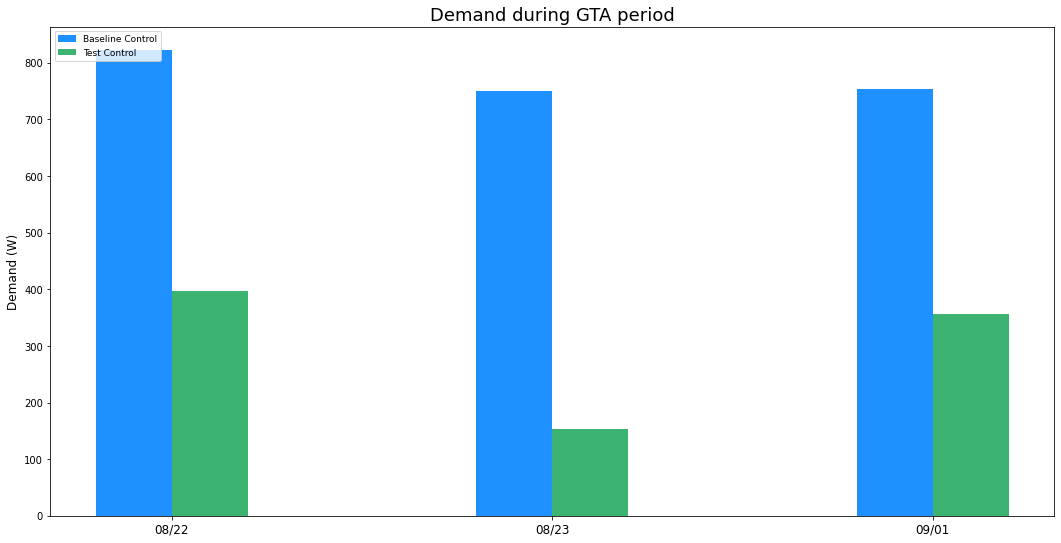

In [19]:

shed_demand_plot(data23, shed_1a, shed_1b, 'Demand during GTA period', 'Demand (W)')

### Thermal comfort

In [20]:
data22 = data22.assign(nor_zat_deg = 'nor_zat_deg') 
#for i in range(len(data20.index)):

def zat_col(df_zat, df_cool_sp):
    df_zat = df_zat.apply(lambda x: (x-32)/1.8)
    df_cool_sp = df_cool_sp.apply(lambda x: (x-32)/1.8)
    
    df_zat_deg = df_zat - df_cool_sp
    df_zat_deg = df_zat_deg.apply(lambda x:0 if x <= 0 else x)
    return (df_zat_deg)

In [21]:
data22['nor_zat_deg'] = zat_col(data22['1A-VAV1-Zn_Temp'], data23['1B-VAV1-OccupiedCoolingSetpt'])
data22['cor_zat_deg'] = zat_col(data22['1A-VAV2-Zn_Temp'], data23['1B-VAV2-OccupiedCoolingSetpt'])
data22['sou_zat_deg'] = zat_col(data22['1A-VAV3-Zn_Temp'], data23['1B-VAV3-OccupiedCoolingSetpt'])

data23['nor_zat_deg'] = zat_col(data23['1B-VAV1-Zn_Temp'], data23['1B-VAV1-OccupiedCoolingSetpt'])
data23['cor_zat_deg'] = zat_col(data23['1B-VAV2-Zn_Temp'], data23['1B-VAV2-OccupiedCoolingSetpt'])
data23['sou_zat_deg'] = zat_col(data23['1B-VAV3-Zn_Temp'], data23['1B-VAV3-OccupiedCoolingSetpt'])

In [22]:
def calc_stats(df, df_temp):
   
    overshoot = []
    mean = []
    median = []
    std = []
    oc_st = datetime.time(7,0,0)
    oc_en = datetime.time(19,0,0)

    oc_time = ((df['time'] >= oc_st) & (df['time'] <= oc_en))
    day_range=day_range1
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        
    day_range=day_range2
        
    for day in range(day_range[1],day_range[2]+1):    
        mask_1 = data22['date'] == datetime.date(2021, day_range[0], day)
        daily_mean = df_temp[mask_1][oc_time].mean()
        daily_median = df_temp[mask_1][oc_time].median()
        #print('Variance', df[df[i] > target[i]].var())
        daily_std = df_temp[mask_1][oc_time].std()
        
        mean.append(daily_mean)
        median.append(daily_median)
        std.append(daily_std)
        
        daily_shoot = sum(df_temp[mask_1][oc_time]*.25)
        counter = sum(df_temp[mask_1][oc_time]>0)
        overshoot.append(daily_shoot)
        

    return(overshoot, mean, median, std)

In [23]:
data22_nor_zat_deg, data22_nor_mean, data22_nor_median, data22_nor_std = calc_stats(data22, data22['nor_zat_deg'])
data22_cor_zat_deg, data22_cor_mean, data22_cor_median, data22_cor_std = calc_stats(data22, data22['cor_zat_deg'])
data22_sou_zat_deg, data22_sou_mean, data22_sou_median, data22_sou_std = calc_stats(data22, data22['sou_zat_deg'])

data23_nor_zat_deg, data23_nor_mean, data23_nor_median, data23_nor_std = calc_stats(data23, data23['nor_zat_deg'])
data23_cor_zat_deg, data23_cor_mean, data23_cor_median, data23_cor_std = calc_stats(data23, data23['cor_zat_deg'])
data23_sou_zat_deg, data23_sou_mean, data23_sou_median, data23_sou_std = calc_stats(data23, data23['sou_zat_deg'])

In [24]:
print(data22_nor_zat_deg, data22_nor_mean, data23_nor_median, data23_nor_std)

[0.0, 0.0, 128.44027777777777] [0.0, 0.0, 10.484920634920634] [0.0, 0.0, 0.0] [0.0, 0.0, 15.003145845515885]


In [25]:
scenario_dict = {}
scenario_dict[1] = calc_stats(data22, data22['nor_zat_deg'])
scenario_dict[2] = calc_stats(data22, data22['cor_zat_deg'])
scenario_dict[3] = calc_stats(data22, data22['sou_zat_deg'])

scenario_dict[4] = calc_stats(data23, data23['nor_zat_deg'])
scenario_dict[5] = calc_stats(data23, data23['cor_zat_deg'])
scenario_dict[6] = calc_stats(data23, data23['sou_zat_deg'])

In [26]:
scenario_dict = {'data22': {"nor": calc_stats(data22, data22['nor_zat_deg']),
                            "cor": calc_stats(data22, data22['cor_zat_deg']), 
                            "sou": calc_stats(data22, data22['sou_zat_deg'])}, 
                 
                 'data23': {"nor": calc_stats(data23, data23['nor_zat_deg']),
                            "cor": calc_stats(data23, data23['cor_zat_deg']), 
                            "sou": calc_stats(data23, data23['sou_zat_deg'])}}

In [27]:
print(scenario_dict['data23']['sou'])
print(scenario_dict['data23']['sou'][0][1:5])

([0.8555555555555561, 0.4472222222222193, 121.80416666666666], [0.06984126984126988, 0.03650793650793627, 9.943197278911564], [0.0, 0.0, 0.03888888888888431], [0.23208717054699532, 0.11722748803338386, 14.275407429759417])
[0.4472222222222193, 121.80416666666666]


In [28]:
print(sum(data22_nor_zat_deg), sum(data23_nor_zat_deg))
print(sum(data22_cor_zat_deg), sum(data23_cor_zat_deg))
print(sum(data22_sou_zat_deg), sum(data23_sou_zat_deg))

128.44027777777777 126.52916666666667
126.7236111111111 127.60694444444445
119.80972222222223 123.10694444444444


In [29]:
print(data22_nor_zat_deg,data22_cor_zat_deg,data22_sou_zat_deg)

[0.0, 0.0, 128.44027777777777] [0.0, 0.0, 126.7236111111111] [0.17361111111111338, 0.06250000000000355, 119.57361111111112]


In [30]:
print(data23_nor_zat_deg,data23_cor_zat_deg,data23_sou_zat_deg)

[0.0, 0.0, 126.52916666666667] [0.40277777777777857, 0.4166666666666652, 126.78750000000001] [0.8555555555555561, 0.4472222222222193, 121.80416666666666]


['08/22', '08/23', '09/01']
[datetime.date(2021, 8, 22) datetime.date(2021, 8, 23)
 datetime.date(2021, 9, 1)]
[0.0, 0.0, 10.484920634920634]


/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:142: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .2, wspace=.15)
/Users/huangwp/Documents/git/HIL-Sim/flexlab/test_data_analysis/db_plotting.py:214: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels, fontsize = 12)


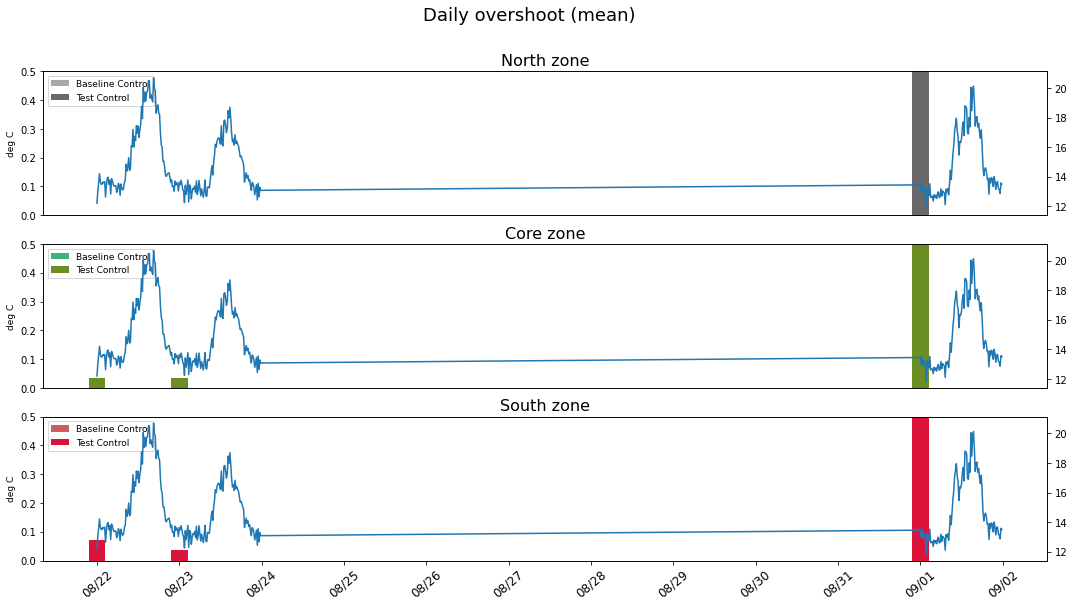

In [31]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
db_plotting.thermal_comfort_plot(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 1, ylabel[2], title_dict[2])

# Zone Air Temperature

/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/4033907057.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.subplots_adjust(hspace = .4, wspace=.15)


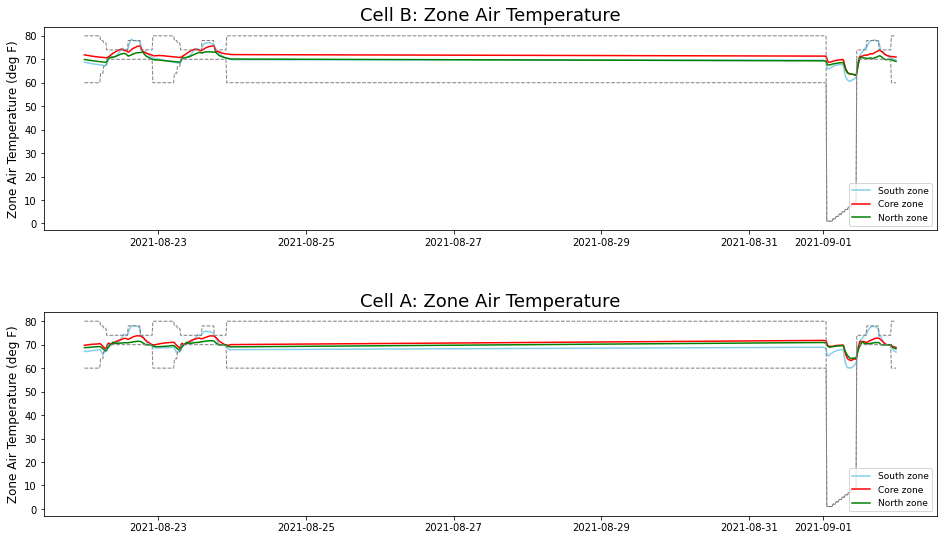

In [32]:
fig, (ax1, ax) = plt.subplots(nrows = 2, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',figsize = (16,9))
fig.subplots_adjust(hspace = .4, wspace=.15)

ax1.plot(data23['1B-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data23['1B-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data23['1B-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data23['1B-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data23['1B-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax.plot(data22['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax.plot(data22['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax.plot(data22['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax.plot(data22['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax.plot(data22['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)
ax.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)
ax.set_title('Cell A: Zone Air Temperature', fontsize = 18)

ax.legend(fontsize = 9, loc = 4)
ax1.legend(fontsize = 9, loc = 4)

Text(0.5, 0.98, 'Cell A: Zone Air Temperature')

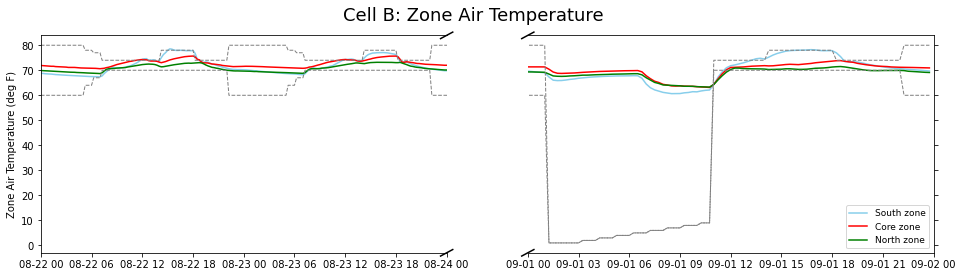

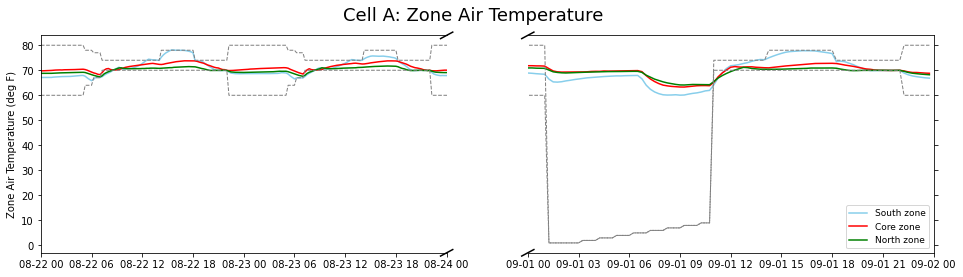

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, facecolor='w', edgecolor='k',figsize = (16,4))
#fig.subplots_adjust(hspace = .4, wspace=.15)


# plot the same data on both axes
#ax.plot(x, y)
#ax2.plot(x, y)


ax1.plot(data23['1B-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data23['1B-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data23['1B-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data23['1B-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data23['1B-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax2.plot(data23['1B-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax2.plot(data23['1B-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax2.plot(data23['1B-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax2.plot(data23['1B-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax2.plot(data23['1B-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')


day_range=day_range1

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 
day_range=day_range2
ax2.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 



# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelleft='off')
ax2.yaxis.tick_right()
#ax2.tick_params(labelright='off')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)



#ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

#ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)

ax2.legend(fontsize = 9, loc = 4)


ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 10)


#ax1.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)]) 
#ax.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)])


fig.suptitle('Cell B: Zone Air Temperature', fontsize = 18)

#fig.subplots_adjust(hspace=14)



# -------------------------------------------------------------------

fig, (ax1, ax2) = plt.subplots(1,2, sharey=True, facecolor='w', edgecolor='k',figsize = (16,4))
#fig.subplots_adjust(hspace = .4, wspace=.15)


# plot the same data on both axes
#ax.plot(x, y)
#ax2.plot(x, y)


ax1.plot(data22['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax1.plot(data22['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax1.plot(data22['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax1.plot(data22['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax1.plot(data22['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')

ax2.plot(data22['1A-VAV3-Zn_Temp'], label = 'South zone', color = 'skyblue')
ax2.plot(data22['1A-VAV2-Zn_Temp'], label = 'Core zone', color = 'red')
ax2.plot(data22['1A-VAV1-Zn_Temp'], label = 'North zone', color = 'green')
ax2.plot(data22['1A-VAV3-OccupiedCoolingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')
ax2.plot(data22['1A-VAV3-OccupiedHeatingSetpt'], color = 'grey', linewidth= 1, linestyle = 'dashed')


day_range=day_range1

ax1.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021,day_range[0], day_range[2]+1)]) 
day_range=day_range2
ax2.set_xlim([datetime.date(2021, day_range[0], day_range[1]),datetime.date(2021, day_range[0], day_range[2]+1)]) 



# hide the spines between ax and ax2
ax1.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax1.yaxis.tick_left()
ax1.tick_params(labelleft='off')
ax2.yaxis.tick_right()
#ax2.tick_params(labelright='off')

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((1-d,1+d), (-d,+d), **kwargs)
ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d,+d), (1-d,1+d), **kwargs)
ax2.plot((-d,+d), (-d,+d), **kwargs)



#ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

#ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)

ax2.legend(fontsize = 9, loc = 4)


ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 10)


#ax1.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)]) 
#ax.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)])


fig.suptitle('Cell A: Zone Air Temperature', fontsize = 18)

#fig.subplots_adjust(hspace=14)



# -------------------------------------------------------------------

### test code 2 start

In [34]:
import matplotlib.dates as mdates

def thermal_comfort_plot3(data_1, inp_1, inp_2, inp_3, inp_4, inp_5, inp_6, scenario_dict, metric, ylabel, title_dict):
    
    # data_1 is the full RAW data, have 6 inputs, 
    
    #fig, (ax, ax1, ax2) = plt.subplots(nrows = 3, ncols = 1, constrained_layout=True, facecolor='w', edgecolor='k',
                                      # figsize = (18,9))
    
    
    
    
    
    #fig.subplots_adjust(hspace = .2, wspace=.15)
    # so the row is 3 and columns is 1 

    inp_day = data_1['date'].unique() # capture unique dates from the date column
    inp_day = inp_day.tolist() #convert to a list for unique days
    import datetime
    #from datetime import datetime, timedelta
    for i in range(len(inp_day)):
        inp_day[i]=datetime.datetime.combine(inp_day[i], datetime.datetime.min.time())
    
    
    # create labels for each date of the test
    labels = []
    labels1 = []
    for i in range(0,len(inp_day)):
        labels.append(inp_day[i].strftime('%m/%d'))

    print(labels) # print out the variable "labels" with unique days
    width = datetime.timedelta(hours = 3)
    x = np.array(inp_day)
    #bar1=np.arange(len(x))
    #bar2=[i+width for i in bar1]
    
    print(x)
    print(inp_1[metric][0:len(labels)+1])# print the 0:overshoot, 1:mean data for all days from the first input
    
    shift1 = datetime.timedelta(hours = 1.5)
    shift2 = datetime.timedelta(hours = 4.5)
    
    #shift = pd.to_timedelta('6h')
    
    #shift=0.2
    
    
    fig1, (ax1, ax2) = plt.subplots(1,2, sharey=True, facecolor='w', edgecolor='k',figsize = (18,3))
    day_range=day_range1
    ax1.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)])
    #ax1.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, 9,1,0,0)])
    day_range=day_range2
    ax2.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)]) 
    
    #ax.xaxis_date()
    ax1.get_xaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    
    ax12 = ax1.twinx()
    ax12.plot(data_1['1B-OAT-1'])
    ax22 = ax2.twinx()
    ax22.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    
    
    
    
    #ax1.bar(inp_1.index-shift, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    #ax2.bar(inp_1.index-shift, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    #ax1.bar(inp_2.index+shift, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    #ax2.bar(inp_2.index+shift, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    
    
    
    
    ax1.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax2.bar(x+shift1, inp_1[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'darkgrey')
    ax1.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    ax2.bar(x+shift2, inp_2[metric][0:len(labels)+1], width = width, label='Test Control', color = 'dimgrey')
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    
    
    
    plt.subplots_adjust(wspace=0.05)
    # hide the spines between ax and ax2
    ax1.spines['right'].set_visible(False)
    ax12.spines['right'].set_visible(False)
    ax12.tick_params(labelright=False,right=False)
    ax2.spines['left'].set_visible(False)
    ax22.spines['left'].set_visible(False)
    ax22.spines['right'].set_visible(False)
    ax1.yaxis.tick_left()
    #ax1.tick_params(labelleft='off')
    ax2.yaxis.tick_right()
    ax2.tick_params(right=False)

    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((1-d,1+d), (-d,+d), **kwargs)
    ax1.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
    ax2.plot((-d,+d), (1-d,1+d), **kwargs)
    ax2.plot((-d,+d), (-d,+d), **kwargs)



    #ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

    #ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)



    ax1.set_ylabel(ylabel, fontsize = 9)


    #ax1.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)]) 
    #ax.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)])


    fig1.suptitle(title_dict+'\n \nNorth zone', fontsize = 16,y=1.15)
    
    ax1.legend(fontsize = 9, loc = 2)
    
    
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax1.set_ylim(0,2.5)
        ax2.set_ylim(0,2.5)
    else:
        ax1.set_ylim(0,0.5)
        ax2.set_ylim(0,0.5)
    # --------------------------------------------------------------------------------
    
     #plot 3rd and 4th input of the 0:overshoot, 1:mean data 


    

    fig2, (ax3, ax4) = plt.subplots(1,2, sharey=True, facecolor='w', edgecolor='k',figsize = (18,3))
    day_range=day_range1
    ax3.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)])
    #ax3.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, 9,1,0,0)])
    day_range=day_range2
    ax4.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)]) 
    
    #ax.xaxis_date()
    ax3.get_xaxis().set_visible(False)
    ax4.get_xaxis().set_visible(False)
    
    ax32 = ax3.twinx()
    ax32.plot(data_1['1B-OAT-1'])
    ax42 = ax4.twinx()
    ax42.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    
    
    
    
    ax3.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax4.bar(x+shift1, inp_3[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'mediumseagreen')
    ax3.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    ax4.bar(x+shift2, inp_4[metric][0:len(labels)+1], width = width, label='Test Control', color = 'olivedrab')
    
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    
    plt.subplots_adjust(wspace=0.05)
    ax3.spines['right'].set_visible(False)
    ax32.spines['right'].set_visible(False)
    ax32.tick_params(labelright=False,right=False)
    ax4.spines['left'].set_visible(False)
    ax42.spines['left'].set_visible(False)
    ax42.spines['right'].set_visible(False)
    ax3.yaxis.tick_left()
    #ax1.tick_params(labelleft='off')
    ax4.yaxis.tick_right()
    ax4.tick_params(right=False)
    
    
    
    

    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax3.transAxes, color='k', clip_on=False)
    ax3.plot((1-d,1+d), (-d,+d), **kwargs)
    ax3.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax4.transAxes)  # switch to the bottom axes
    ax4.plot((-d,+d), (1-d,1+d), **kwargs)
    ax4.plot((-d,+d), (-d,+d), **kwargs)



    #ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

    #ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)



    ax3.set_ylabel(ylabel, fontsize = 9)


    #ax1.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)]) 
    #ax.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)])


    fig2.suptitle('Core zone', fontsize = 16)
    
    ax3.legend(fontsize = 9, loc = 2)
    
    
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax3.set_ylim(0,2.5)
        ax4.set_ylim(0,2.5)
    else:
        ax3.set_ylim(0,0.5)
        ax4.set_ylim(0,0.5)    
    
    # -------------------------------------------------------------------------------------------
    

    
    
    fig3, (ax5, ax6) = plt.subplots(1,2, sharey=True, facecolor='w', edgecolor='k',figsize = (18,3))
    day_range=day_range1
    ax5.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)])
    #ax5.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, 9,1,0,0)])
    day_range=day_range2
    ax6.set_xlim([datetime.datetime(2021, day_range[0], day_range[1],0,0),datetime.datetime(2021, day_range[0], day_range[2]+1,0,0)])  
    
    #ax.xaxis_date()
    #ax1.get_xaxis().set_visible(False)
    #ax2.get_xaxis().set_visible(False)
    
    ax52 = ax5.twinx()
    ax52.plot(data_1['1B-OAT-1'])
    ax62 = ax6.twinx()
    ax62.plot(data_1['1B-OAT-1'])
    #ax.set_xticks(range(len(labels)))
    
    
    
    
    ax5.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax6.bar(x+shift1, inp_5[metric][0:len(labels)+1], width = width, label='Baseline Control', color = 'indianred')
    ax5.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    ax6.bar(x+shift2, inp_6[metric][0:len(labels)+1], width = width, label='Test Control', color = 'crimson')
    
    
    # plot 1st and 2nd input of the 0:overshoot, 1:mean data with the width data defined above
    
    
    
    plt.subplots_adjust(wspace=0.05)
    ax5.spines['right'].set_visible(False)
    ax52.spines['right'].set_visible(False)
    ax52.tick_params(labelright=False,right=False)
    ax6.spines['left'].set_visible(False)
    ax62.spines['left'].set_visible(False)
    ax62.spines['right'].set_visible(False)
    ax5.yaxis.tick_left()
    ax6.yaxis.tick_right()
    ax6.tick_params(right=False)
    
    

    d = .015 # how big to make the diagonal lines in axes coordinates
    # arguments to pass plot, just so we don't keep repeating them
    kwargs = dict(transform=ax5.transAxes, color='k', clip_on=False)
    ax5.plot((1-d,1+d), (-d,+d), **kwargs)
    ax5.plot((1-d,1+d),(1-d,1+d), **kwargs)

    kwargs.update(transform=ax6.transAxes)  # switch to the bottom axes
    ax6.plot((-d,+d), (1-d,1+d), **kwargs)
    ax6.plot((-d,+d), (-d,+d), **kwargs)



    #ax1.set_ylabel('Zone Air Temperature (deg F)', fontsize = 12)

    #ax1.set_title('Cell B: Zone Air Temperature', fontsize = 18)



    ax5.set_ylabel(ylabel, fontsize = 9)


    #ax1.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)]) 
    #ax.set_xlim([datetime.date(2021, 8, 26),datetime.date(2021, 9, 5)])


    fig3.suptitle('South zone', fontsize = 16)
    
    ax5.legend(fontsize = 9, loc = 2)
    
    
    #ax2.set_xticks(range(len(labels)))
    if metric == 0:
        ax5.set_ylim(0,2.5)
        ax6.set_ylim(0,2.5)
    else:
        ax5.set_ylim(0,0.5)
        ax6.set_ylim(0,0.5)   
    
    
    #ax2.xaxis_date()
    #ax2.set_xtick(bar1,x)
    ax5.set_xticklabels(x, fontsize = 12)

    ax5.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax5.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax5.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!
        
        
        
    ax6.set_xticklabels(x, fontsize = 12)

    ax6.xaxis.set_major_locator(mdates.DayLocator(interval=1))  
    ax6.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d')) 
    for label in ax6.get_xticklabels():
        label.set_rotation(40)     # Format the x label at the last graph!
    print(x)
    print(type(x))
    
    
   

['08/22', '08/23', '09/01']
[datetime.datetime(2021, 8, 22, 0, 0) datetime.datetime(2021, 8, 23, 0, 0)
 datetime.datetime(2021, 9, 1, 0, 0)]
[0.0, 0.0, 128.44027777777777]
[datetime.datetime(2021, 8, 22, 0, 0) datetime.datetime(2021, 8, 23, 0, 0)
 datetime.datetime(2021, 9, 1, 0, 0)]
<class 'numpy.ndarray'>


/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/2167418685.py:314: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(x, fontsize = 12)
/var/folders/31/7jjh3bzd6_d_tmg49kbcdsb40000gp/T/ipykernel_874/2167418685.py:323: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax6.set_xticklabels(x, fontsize = 12)


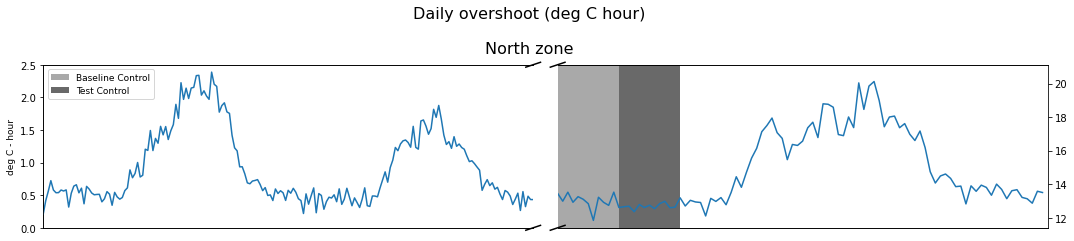

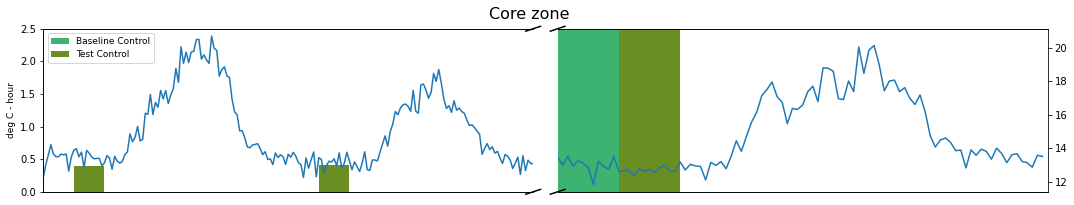

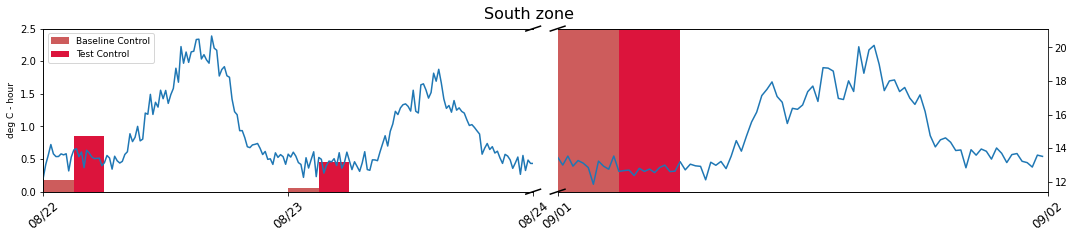

In [38]:
# key for metrics to be plotted in the scenario dictionary; {1:'overshoot', 2:'mean', 3:'median', 4:'std_dev'}
title_dict = {1: 'Daily overshoot (deg C hour)', 2:'Daily overshoot (mean)', 3:'Daily overshoot (median)' , 4:'Daily overshoot (standard deviation)'}
ylabel = {1: 'deg C - hour', 2: 'deg C', 3: 'deg C', 4: 'deg C'}
thermal_comfort_plot3(data22, scenario_dict['data22']['nor'], scenario_dict['data23']['nor'], 
                                 scenario_dict['data22']['cor'], scenario_dict['data23']['cor'], 
                                 scenario_dict['data22']['sou'], scenario_dict['data23']['sou'],
                                 scenario_dict, 0, ylabel[1], title_dict[1])